In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
files = np.sort(glob.glob('/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS*.xlsx'))

In [3]:
names = [files[i].split('/')[-1][4:-5] for i in range(len(files))]

Causality
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Causality.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Downscaling
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Downscaling.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Downscaling_MME
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Downscaling_MME.xlsx
Emulation
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Emulation.xlsx
ModelIndependence
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_ModelIndependence.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


TotalML
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_TotalML.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


TotalML_1
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_TotalML_1.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


TotalML_MME
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_TotalML_MME.xlsx
XAI
/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_XAI.xlsx


/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


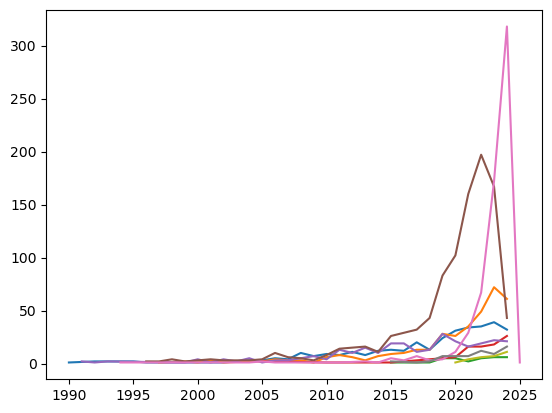

In [4]:
dic_data = {}
for ifile, file in enumerate(files):
    print(names[ifile])
    print(file)
    # Read the CSV data
    data = pd.read_excel(file, sheet_name='savedrecs', skiprows=10)
    dic_data[names[ifile]] = data
    plt.plot(data.groupby('Publication Year').count()['Title'])

In [5]:
dic_data['TotalML'] = pd.concat([dic_data['TotalML'],dic_data['TotalML_1']])
del dic_data['TotalML_1']

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_publications_time_series(publications_dict,path_save = None):
    """
    Plots a time series bar plot of the number of publications per year
    for different categories of papers, with side-by-side bars for each year.
    
    Parameters:
    - publications_dict: dict of DataFrames
        A dictionary where keys are category names and values are DataFrames 
        with a 'Year' column and a 'Publications' column.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    
    # Determine bar width and calculate positions
    bar_width = 0.9 / len(publications_dict)  # Dynamic width based on the number of categories
    years = publications_dict[next(iter(publications_dict))].index.values  # Common years
    
    # Plot each category with an offset to avoid overlap
    for i, (category, df) in enumerate(publications_dict.items()):
        # Sort and prepare data
        df_sorted = df.sort_values(by="Year")
        # Offset each category by its index in the dictionary
        positions = df_sorted.index + i * bar_width - 0.45
        
        plt.bar(
            positions, 
            df_sorted['Publications'], 
            label=dic_long_names[category], 
            alpha=0.75,
            width=bar_width,
            color=dic_colors[category]
        )
    
    # Customize plot
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Publications', fontsize=14)
    plt.title('Publications per year by category', fontsize=16)
    plt.xticks(ticks=np.arange(2004,2025), labels=np.arange(2004,2025), rotation=45)
    plt.xlim(2004,2025)
    # plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
    plt.legend(title='Category')
    plt.tight_layout()
    sns.despine()
    
    # Show plot
    if path_save is None:
        plt.show()
    else:
        plt.savefig(path_save,bbox_inches='tight')

# Example usage with dummy data
# publications_dict = {
#     "Category A": pd.DataFrame({"Year": [2018, 2019, 2020], "Publications": [50, 60, 70]}),
#     "Category B": pd.DataFrame({"Year": [2018, 2019, 2020], "Publications": [30, 40, 50]}),
# }
# plot_publications_time_series(publications_dict)

In [66]:
dic_data.keys()

dict_keys(['Causality', 'Downscaling', 'Downscaling_MME', 'Emulation', 'ModelIndependence', 'TotalML', 'TotalML_MME', 'XAI'])

In [67]:
list_colors = ["#4682B4", "#DAA520", "#CD5C5C", "#B8860B", "#FF8C00", "#708090", "#008B8B", "#F4A460", "#4169E1",  "#3CB371"]

dic_colors = {}
for ikey, key in enumerate(dic_data.keys()):
    dic_colors[key] = list_colors[ikey]

In [68]:
list_long_names = ['Causality', 'Downscaling', 'Downscaling - MMEs', 'Emulation', 'Model Independence', 'ML', 'ML - MMEs', 'XAI']
dic_long_names = {}
for ikey, key in enumerate(dic_data.keys()):
    dic_long_names[key] = list_long_names[ikey]

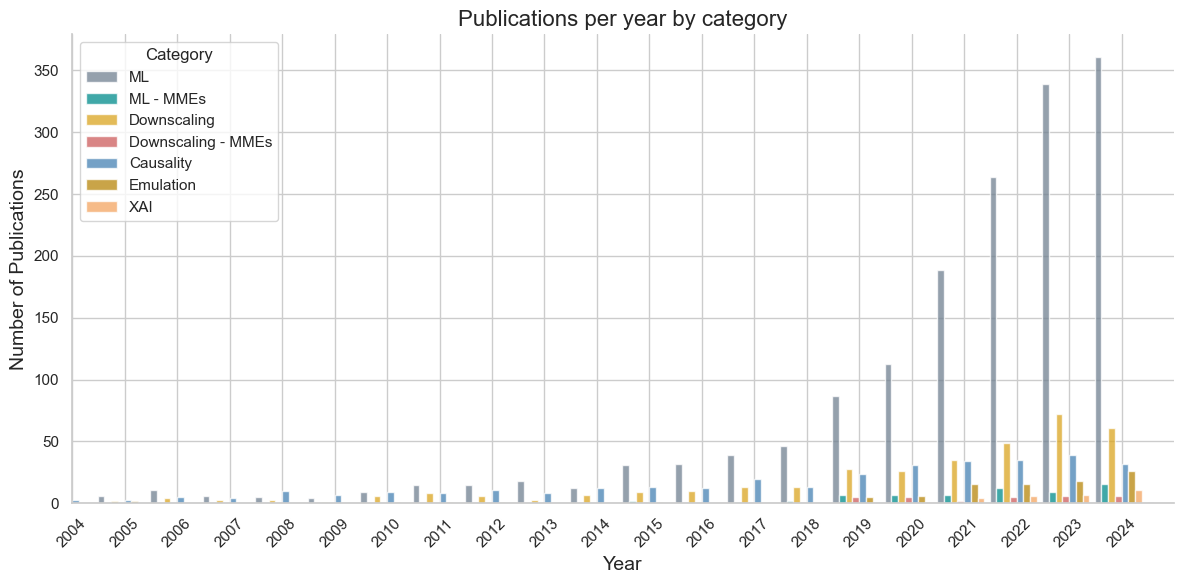

In [69]:
keys = ['TotalML', 'TotalML_MME', 'Downscaling', 'Downscaling_MME', 'Causality', 'Emulation', 'XAI']
dic_subset = {}
for key in keys:
    df_temp = dic_data[key].groupby('Publication Year').count()[['Title']]
    df_temp.index.name = 'Year'
    df_temp = df_temp.rename(columns={'Title': 'Publications'})
    dic_subset[key] = df_temp
    
plot_publications_time_series(dic_subset,'PubliCount_ML_Full.png')

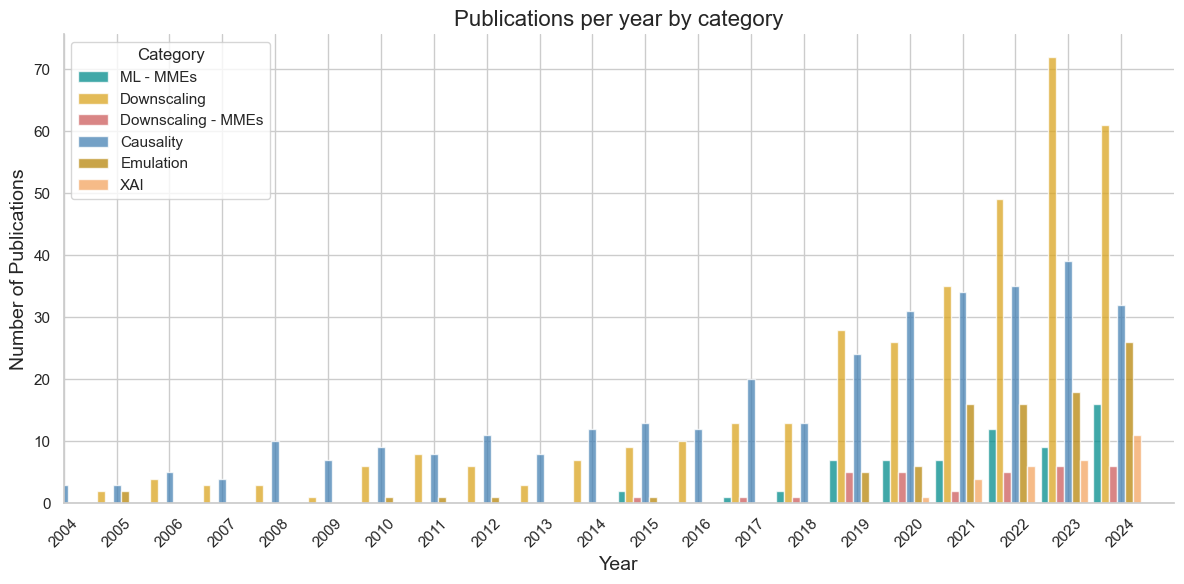

In [70]:
keys = ['TotalML_MME', 'Downscaling', 'Downscaling_MME', 'Causality', 'Emulation', 'XAI']
dic_subset = {}
for key in keys:
    df_temp = dic_data[key].groupby('Publication Year').count()[['Title']]
    df_temp.index.name = 'Year'
    df_temp = df_temp.rename(columns={'Title': 'Publications'})
    dic_subset[key] = df_temp
    
plot_publications_time_series(dic_subset,'PubliCount_ML_Partial.png')

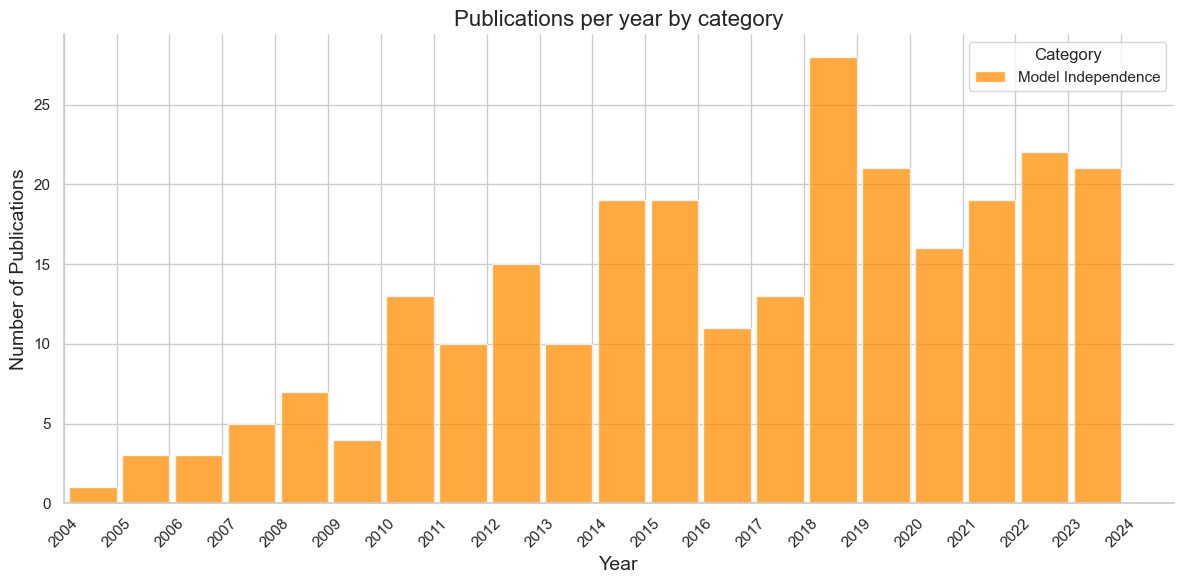

In [71]:
keys = ['ModelIndependence']
dic_subset = {}
for key in keys:
    df_temp = dic_data[key].groupby('Publication Year').count()[['Title']]
    df_temp.index.name = 'Year'
    df_temp = df_temp.rename(columns={'Title': 'Publications'})
    dic_subset[key] = df_temp
    
plot_publications_time_series(dic_subset,'PubliCount_ModelIndependence.png')

In [21]:
data.groupby('Publication Year').count()

,Title,Authors,Corporate Authors,Editors,Book Editors,Source Title,Publication Date,Volume,Issue,Part Number,Supplement,Special Issue,Beginning Page,Ending Page,Article Number,DOI,Conference Title,Conference Date,Total Citations,Average per Year
Publication Year,,,,,,,,,,,,,,,,,,,,
1994,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1
1996,2,2,0,0,0,2,2,2,2,0,0,0,2,2,0,2,0,0,2,2
1997,3,3,0,0,0,3,3,3,3,0,0,0,3,3,0,3,0,0,3,3
1998,3,3,0,0,1,3,3,3,2,0,0,0,3,3,0,3,1,1,3,3
1999,2,2,0,0,0,2,2,2,2,1,0,0,2,2,0,2,0,0,2,2
2000,2,2,0,0,0,2,2,2,2,0,0,0,2,2,0,2,0,0,2,2
2001,2,2,0,0,0,2,2,2,2,0,0,0,2,2,0,2,0,0,2,2
2002,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1
2003,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1


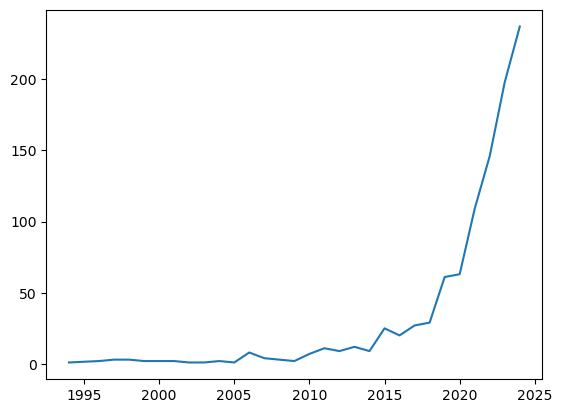

In [6]:
data

,Title,Authors,Corporate Authors,Editors,Book Editors,Source Title,Publication Date,Publication Year,Volume,Issue,...,Supplement,Special Issue,Beginning Page,Ending Page,Article Number,DOI,Conference Title,Conference Date,Total Citations,Average per Year
0,Drought modeling - A review,"Mishra, Ashok K.; Singh, Vijay P.",NaN,NaN,NaN,JOURNAL OF HYDROLOGY,JUN 6 2011,2011,403.0,1-2,...,NaN,NaN,157.0,175,NaN,10.1016/j.jhydrol.2011.03.049,NaN,NaN,916,65.43
1,The analog method as a simple statistical down...,"Zorita, E; von Storch, H",NaN,NaN,NaN,JOURNAL OF CLIMATE,AUG 1999,1999,12.0,8,...,NaN,NaN,2474.0,2489,NaN,10.1175/1520-0442(1999)012<2474:TAMAAS>2.0.CO;2,NaN,NaN,571,21.96
2,Dowinscaling of precipitation for climate chan...,"Tripathi, Shivam; Srinivas, V. V.; Nanjundiah,...",NaN,NaN,NaN,JOURNAL OF HYDROLOGY,NOV 15 2006,2006,330.0,3-4,...,NaN,NaN,621.0,640,NaN,10.1016/j.jhydrol.2006.04.030,NaN,NaN,395,20.79
3,Climate change projections for the tropical An...,"Urrutia, Rocio; Vuille, Mathias",NaN,NaN,NaN,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,JAN 23 2009,2009,114.0,NaN,...,NaN,NaN,NaN,NaN,D02108,10.1029/2008JD011021,NaN,NaN,331,20.69
4,Downscaling heavy precipitation over the Unite...,"Haylock, Malcolm R.; Cawley, Gavin C.; Harpham...",NaN,NaN,NaN,INTERNATIONAL JOURNAL OF CLIMATOLOGY,AUG 2006,2006,26.0,10,...,NaN,NaN,1397.0,1415,NaN,10.1002/joc.1318,NaN,NaN,272,14.32
5,A comparison between Ensemble and MaxEnt speci...,"Kaky, Emad; Nolan, Victoria; Alatawi, Abdulazi...",NaN,NaN,NaN,ECOLOGICAL INFORMATICS,NOV 2020,2020,60.0,NaN,...,NaN,NaN,NaN,NaN,101150,10.1016/j.ecoinf.2020.101150,NaN,NaN,228,45.60
6,Using Machine Learning to Parameterize Moist C...,"O'Gorman, Paul A.; Dwyer, John G.",NaN,NaN,NaN,JOURNAL OF ADVANCES IN MODELING EARTH SYSTEMS,OCT 2018,2018,10.0,10,...,NaN,NaN,2548.0,2563,NaN,10.1029/2018MS001351,NaN,NaN,217,31.00
7,Amazon rainforest photosynthesis increases in ...,"Green, J. K.; Berry, J.; Ciais, P.; Zhang, Y.;...",NaN,NaN,NaN,SCIENCE ADVANCES,NOV 2020,2020,6.0,47,...,NaN,NaN,NaN,NaN,eabb7232,10.1126/sciadv.abb7232,NaN,NaN,213,42.60
8,Machine learning methods for crop yield predic...,"Crane-Droesch, Andrew",NaN,NaN,NaN,ENVIRONMENTAL RESEARCH LETTERS,NOV 2018,2018,13.0,11,...,NaN,NaN,NaN,NaN,114003,10.1088/1748-9326/aae159,NaN,NaN,200,28.57
9,Reservoir operations under climate change: Sto...,"Ehsani, Nima; Vorosmarty, Charles J.; Fekete, ...",NaN,NaN,NaN,JOURNAL OF HYDROLOGY,DEC 2017,2017,555.0,NaN,...,NaN,NaN,435.0,446,NaN,10.1016/j.jhydrol.2017.09.008,NaN,NaN,198,24.75


In [4]:
files

['/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_TotalML.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Downscaling.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Downscaling_MME.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_XAI.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Causality.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_TotalML_MME.xlsx',
 '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/WOS_Emulation.xlsx']

In [5]:
# Replace 'your_file.txt' with the path to your .txt file
file_path = '/Users/jhayron/GoogleDrive/Proyectos/FreshEyesOnCMIP/report_WOS_query0.xlsx'

# Read the CSV data
data = pd.read_excel(file_path, sheet_name='savedrecs', skiprows=10)
data = data.iloc[:,:21]

/Users/jhayron/miniforge3/envs/feocmip/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


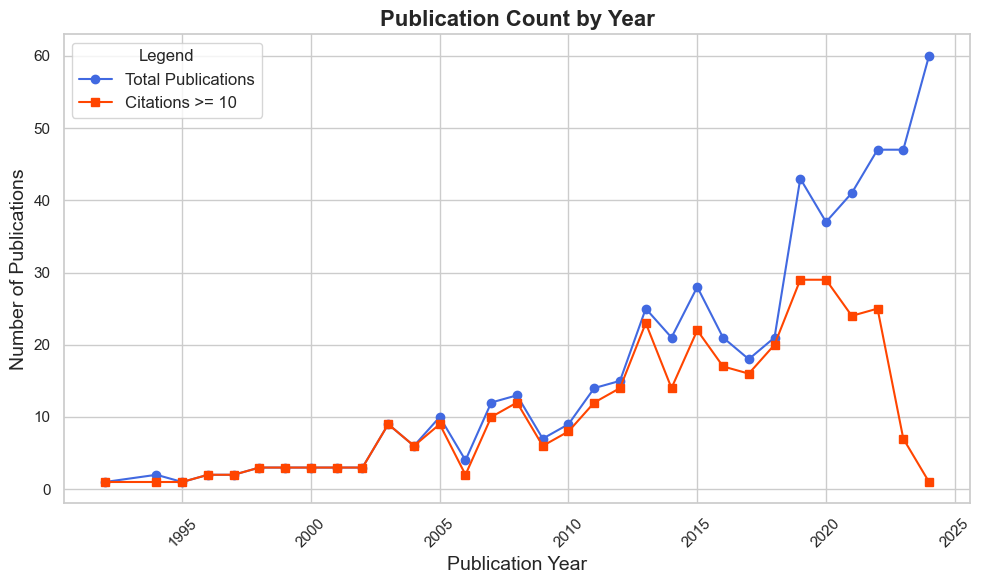

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the total publications
plt.plot(data.groupby('Publication Year').count().Title, label='Total Publications', color='royalblue', marker='o')

# Plot the publications with citations >= 10
plt.plot(data[data['Total Citations'] >= 10].groupby('Publication Year').count().Title, 
         label='Citations >= 10', color='orangered', marker='s')

# Add titles and labels
plt.title('Publication Count by Year', fontsize=16, fontweight='bold')
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)

# Adjust layout for better visibility
plt.tight_layout()

# Save the figure
plt.savefig('publication_count_by_year.png')

# Show the plot
plt.show()

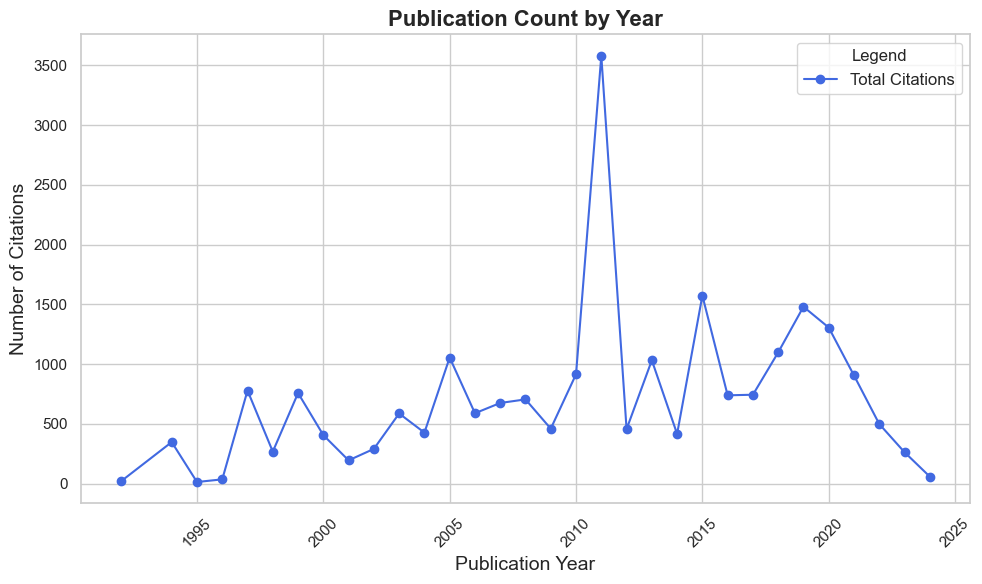

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the total publications
plt.plot(data.groupby('Publication Year').sum('Total Citations')['Total Citations'], label='Total Citations', color='royalblue', marker='o')

# Add titles and labels
plt.title('Publication Count by Year', fontsize=16, fontweight='bold')
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Citations', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)

# Adjust layout for better visibility
plt.tight_layout()

# Save the figure
plt.savefig('citations_count_by_year.png')

# Show the plot
plt.show()

In [28]:
data.groupby('Publication Year').sum('Total Citations')['Total Citations']

Publication Year
1992      21
1994     348
1995      14
1996      36
1997     779
1998     268
1999     758
2000     406
2001     195
2002     291
2003     587
2004     427
2005    1055
2006     589
2007     675
2008     705
2009     460
2010     915
2011    3579
2012     456
2013    1032
2014     416
2015    1573
2016     739
2017     744
2018    1098
2019    1480
2020    1306
2021     905
2022     499
2023     263
2024      59
Name: Total Citations, dtype: int64

In [32]:
data.columns

Index(['Title', 'Authors', 'Corporate Authors', 'Editors', 'Book Editors',
       'Source Title', 'Publication Date', 'Publication Year', 'Volume',
       'Issue', 'Part Number', 'Supplement', 'Special Issue', 'Beginning Page',
       'Ending Page', 'Article Number', 'DOI', 'Conference Title',
       'Conference Date', 'Total Citations', 'Average per Year'],
      dtype='object')